# Run Stable Diffusion to Generate AI Drawings Using KerasCV

In [1]:
# prompt for the image(s); the second line is borrowed from NightCafe Creator
prompt = "Star Wars, " + \
      "head and shoulders portrait, 8k resolution concept art portrait by Greg Rutkowski, Artgerm, WLOP, Alphonse Mucha dynamic lighting hyperdetailed intricately detailed Splash art trending on Artstation triadic colors Unreal Engine 5 volumetric lighting"

# image size has to be multiples of 128; 512 is recommended.
img_size = 512

# how many images to be generated
img_num = 5

# iterations of images  (= image quality)
img_steps = 25

In [2]:
# Do not use GPU runtime in Colab. Stable Diffusion seems to require 10 GB+ GPU memory.
# The following lines turn off CUDA on your machine, required if you don't have enough resources.

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

In [3]:
!pip install --upgrade keras-cv tensorflow tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 5.1 MB/s 
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 4.7 MB 33.5 MB/s 
     |████████████████████████████████| 438 kB 69.3 MB/s 
     |████████████████████████████████| 5.9 MB 50.8 MB/s 
     |████████████████████████████████| 1.7 MB 54.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: fl

In [4]:
import keras_cv
from tensorflow import keras

model = keras_cv.models.StableDiffusion(img_width=img_size, img_height=img_size)
images = model.text_to_image(prompt, batch_size=img_num, num_steps=img_steps)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
25/25 [==============================] - 4609s 184s/step


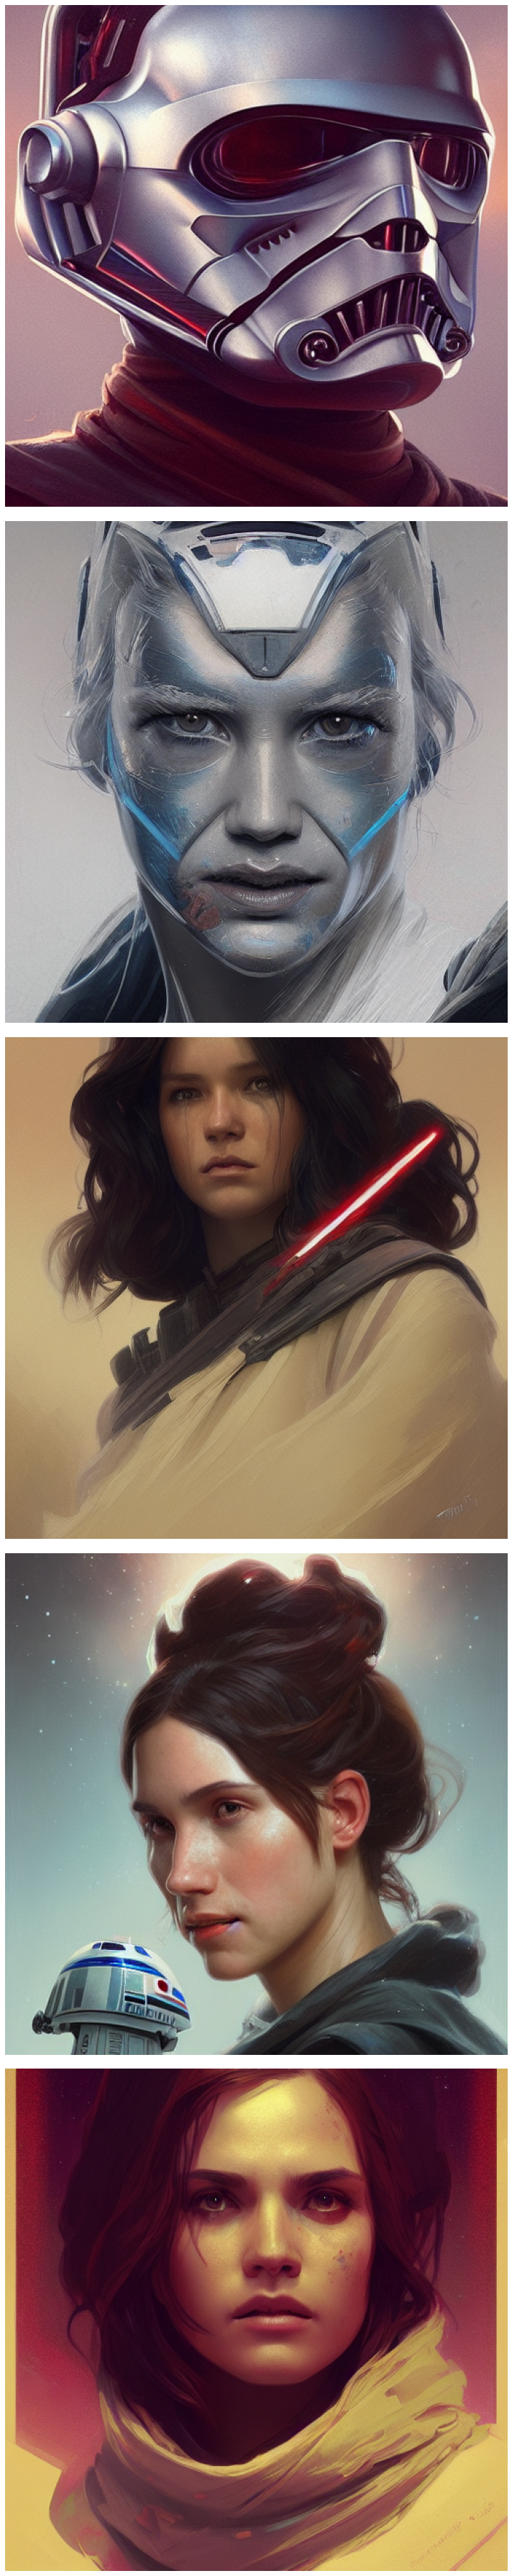

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10 * img_num))

for i, img in enumerate(images):
  ax = fig.add_subplot(img_num, 1, i + 1)
  ax.set_axis_off()
  plt.imshow(img)

plt.tight_layout()
plt.show()